In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
# 그래프 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기

import os # 운영체제(operating system) 관련 패키지 호출

In [4]:
# 현재 작업 디렉토리 확인
os.getcwd()

'C:\\Users\\user'

In [5]:
# 작업 디렉토리 변경

os.chdir('c:/data/exam_sqc')

In [6]:
# anaconda3 경로 확인

import sys
print(sys.executable)

C:\Users\user\anaconda3\python.exe


In [7]:
# 뚜껑 데이터 불러오기

cap = pd.read_csv('뚜껑.csv')
cap.head(10)

,rotate.power,machine
0,24,2
1,14,1
2,18,1
3,27,2
4,17,2
5,32,2
6,31,2
7,27,2
8,21,2
9,27,1


In [8]:
# 데이터 정보 확인

cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   rotate.power  68 non-null     int64
 1   machine       68 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [9]:
# 편의성 유틸

def data_load(file_name, encoding=None):
    return pd.read_csv(os.path.join(os.getcwd(), f'data_sqc/{file_name}.csv'), encoding=encoding)

In [10]:
# 기술통계량 산출

cap['rotate.power'].describe()

count    68.000000
mean     21.264706
std       6.422018
min      10.000000
25%      16.000000
50%      20.000000
75%      24.250000
max      37.000000
Name: rotate.power, dtype: float64

In [11]:
# 데이터 유형 변경
# machine을 문자형으로 변경

cap['machine'] = cap['machine'].astype(str)

In [12]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rotate.power  68 non-null     int64 
 1   machine       68 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [13]:
# 기계 별로 기술통계량 확인
# 평균 : Mean
# 표준편차 : std

a = cap.groupby(['machine']).mean()
a

,rotate.power
machine,
1,18.666667
2,24.187500


In [14]:
# 히스토그램 작성
# seaborn 패키지 활용(데이터 시각화)

import seaborn as sns

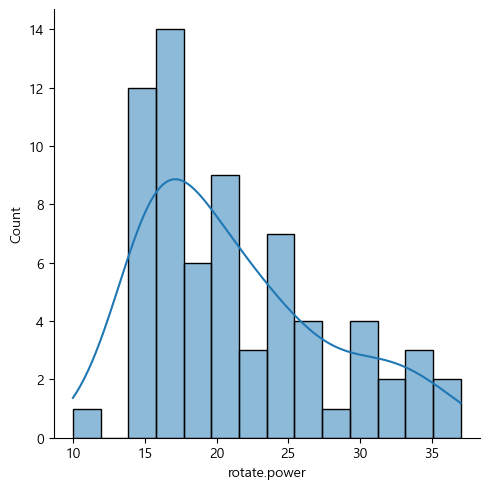

In [15]:
# 전반적인 분포 확인

sns.displot(data = cap,
           x = 'rotate.power',
           bins = 14,  # 막대 갯수
           kde = True) # 추세선

plt.show()

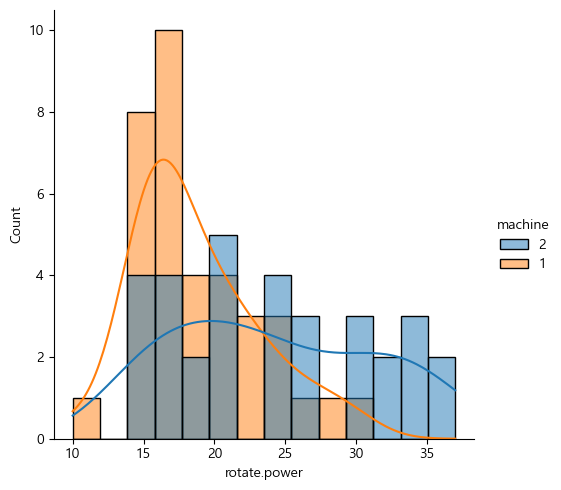

In [16]:
# 그룹 별로 히스토그램 그리기

sns.displot(data = cap,
           x = 'rotate.power',
           hue = 'machine', # 그룹 별 나누기
           bins = 14,
           kde = True)

plt.show()

In [17]:
# 데이터 불러오가
pipe = pd.read_csv('파이프2.csv')
pipe.head()

,diameter,week,machine
0,5.19,1,1
1,5.53,1,2
2,4.78,1,1
3,5.44,1,2
4,4.47,1,1


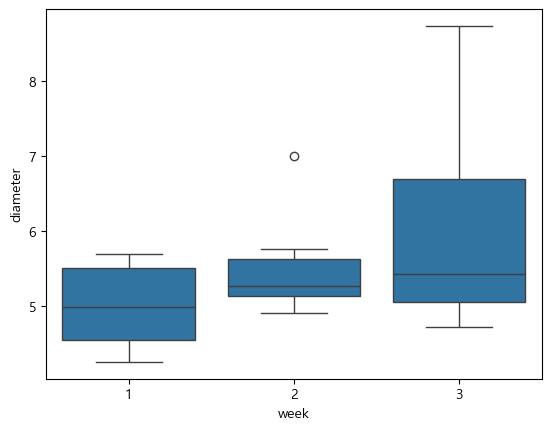

In [18]:
# 주 별로 상자그림 그리기
sns.boxplot(data = pipe,
            x = 'week',
            y = 'diameter')

plt.show()

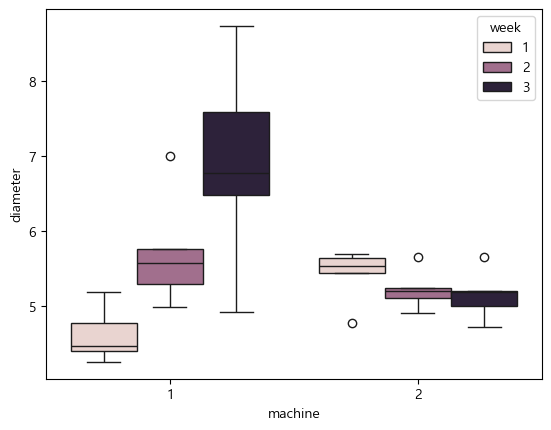

In [19]:
# 기계 별로 주에 따른 상자그림 작성

sns.boxplot(data = pipe,
            x = 'machine',
            y = 'diameter',
           hue = 'week')
plt.show()

In [20]:
# 산점도 그리기
# 데이터 불러오기

scatter_plot = pd.read_csv('작업속도와 결함률.csv')
scatter_plot.head()

,Work.Velocity,Error.Rate
0,16.4,9.08
1,17.7,9.38
2,15.0,8.38
3,16.7,9.40
4,17.5,9.98


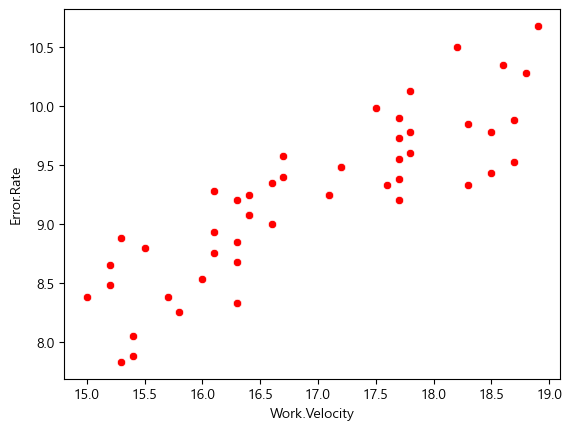

In [21]:
# 산점도

sns.scatterplot(x = 'Work.Velocity',
                y = 'Error.Rate',
                data = scatter_plot,
                color = 'red')

plt.show()

In [22]:
# 상관계수 구하기

corr = stats.pearsonr(scatter_plot['Work.Velocity'], scatter_plot['Error.Rate'])
print('상관계수 : ', corr[0]) # 상관계수 값
print('P-값 : ', corr[1]) # p-값

상관계수 :  0.8580976963338827
P-값 :  1.6898723177430888e-15


In [24]:
# 실습 데이터 불러오기(Gage R&R 연구)

gage_rr = pd.read_csv('gage_R&R_crossed.csv')
gage_rr.head()

,operators,parts,y
0,1,1,9.90
1,1,1,9.85
2,1,2,10.25
3,1,2,10.25
4,1,3,10.10


In [25]:
# Gage R&R 함수 모듈 호출

from gage_rr_final import grr

In [27]:
# Gage R&R 교차 연구 실습

grr(gage_rr, op = 'operators', part = 'parts', measure = 'y', tol = 1.0)


[1] 분산분석표 (Random Effects Model)
                           SS  df      MS        F  p-value
Operator               0.0480   2  0.0240   4.1672   0.0326
Part                   2.0587   9  0.2287  39.7178   0.0000
Operator*Part          0.1037  18  0.0058   4.4588   0.0002
Repeatability (Error)  0.0388  30  0.0013      NaN      NaN

[2] 분산 성분
                               Variance Component  Percent Contribution
Total Gage R&R                           0.004438             10.666592
Repeatability                            0.001292              3.104830
Reproducibility (Operator)               0.000912              2.192299
Reproducibility (Interaction)            0.002234              5.369464
Part-to-Part                             0.037164             89.333408
Total                                    0.041602            100.000000

[3] 연구 변동 및 공정 평가
                                   SD  Study Variation (6σ)  %Study Variation  \
Total Gage R&R                 0.0666              

C:\Users\user\anaconda3\Lib\site-packages\gage_rr_final.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r = df.groupby([op, part])[measure].count().min()


In [32]:
# 관리도를 그리기 위한 함수를 호출
from xbar_r_chart import plot_xbar_r_chart # Xbar-r 관리도를 그리기 위한 목적
import nelson_rules                        # nelson rule 적용을 위한 목적

In [36]:
# 예제 데이터 호출
cam = pd.read_csv('캠축.csv')
cam.head()

,length,supplier1,supplier2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [37]:
# 부분군 설정
# 부분군 형성을 위해서 index를 사용 + index 번호를 1부터 시작하기 위함
cam["Group"] =cam.index // 5 + 1
cam

,length,supplier1,supplier2,Group
0,601.4,598.0,601.6,1
1,601.6,599.8,600.4,1
2,598.0,600.0,598.4,1
3,601.4,599.8,600.0,1
4,599.4,600.0,596.8,1
...,...,...,...,...
95,599.0,599.6,601.2,20
96,601.4,599.8,604.2,20
97,601.8,599.0,600.2,20
98,601.6,599.6,600.0,20


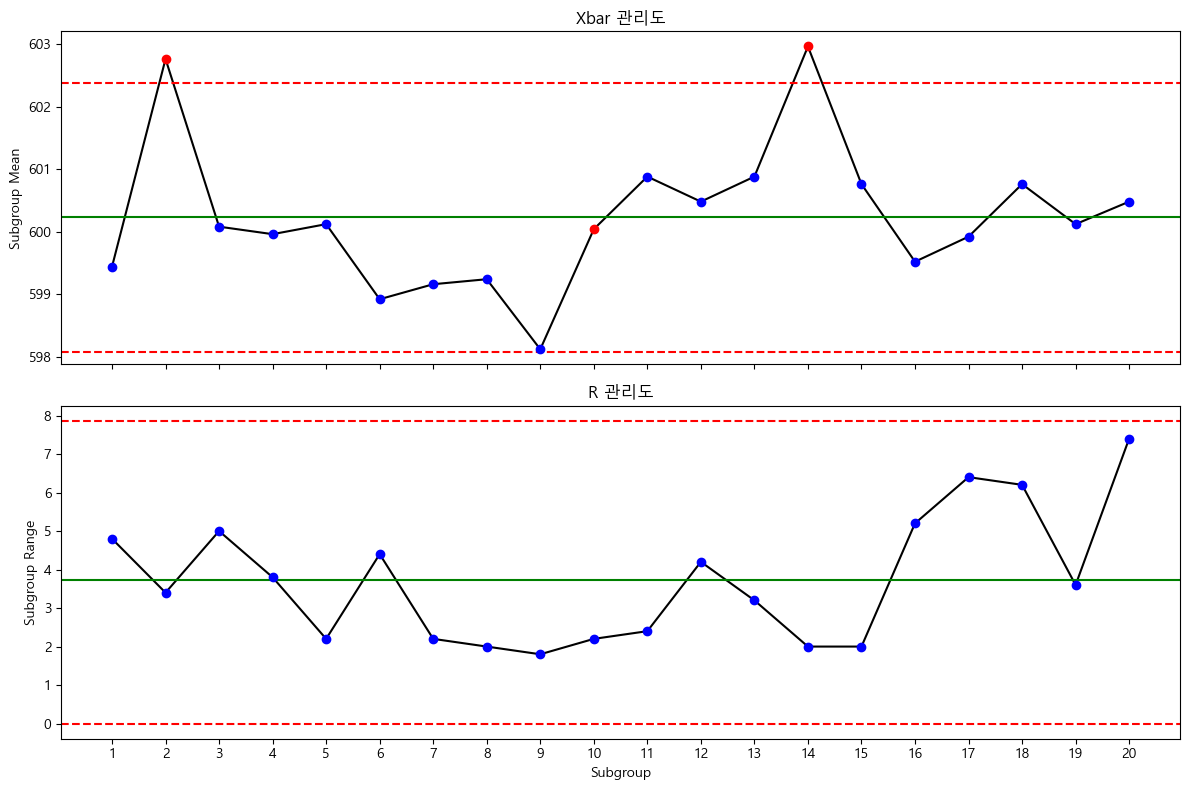

In [38]:
# xbar-r 관리도 그리기

plot_xbar_r_chart(cam, subgroup_size = 5, value_col = "supplier2", nelson_rules = 'all')
plt.show()

In [45]:
# I-MR 관리도를 그리기 위한 함수 모듈 호출
from i_mr_chart import plot_imr_chart # I-MR 관리도를 그리기 위한 함수 호출
weight = pd.read_csv('무게.csv')
weight.head()

,weight
0,905
1,930
2,865
3,895
4,905


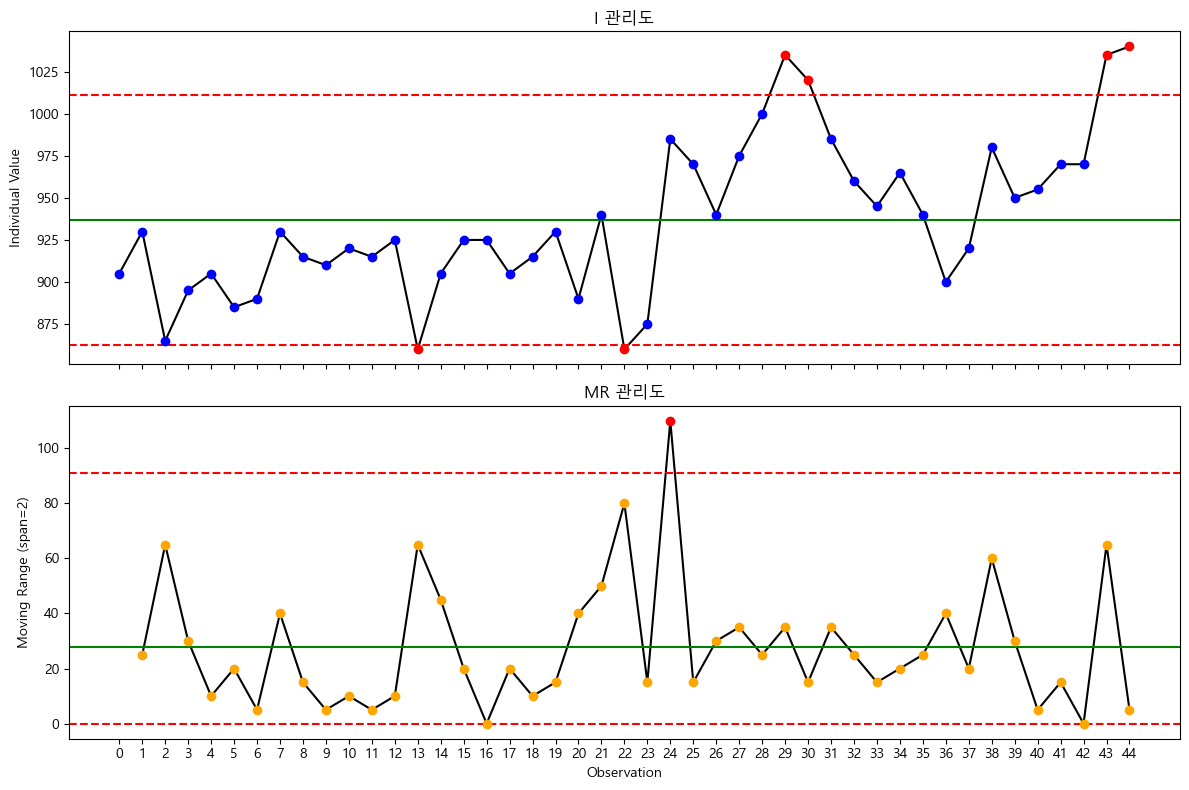

<function i_mr_chart.plot_imr_chart(df: pandas.core.frame.DataFrame, value_col: str, mr_span: int = 2)>

In [46]:
# I-MR 관리도 그리기
plot_imr_chart(weight, value_col = 'weight', mr_span = 2)
plot_imr_chart

In [47]:
# 공정능력분석을 위한 함수 모듈 호출

import capability_analysis
from capability_analysis import capability_analysis_normal # 데이터가 정규분포일떄 공정능력분석 모듈
from capability_plot import plot_capability # 공정능력분석 결과를 해석하기 위한 그래프

In [48]:
# 예제 데이터 불러오기
capa = pd.read_csv('capability.csv')
capa

,data,sub
0,58,1
1,61,1
2,56,1
3,57,1
4,67,2
...,...,...
59,61,15
60,60,16
61,61,16
62,50,16


In [49]:
# 공정능력분석 결과 산출

result = capability_analysis_normal(capa,
                                    value_col = 'data',
                                    subgroup_col = 'sub',
                                    LSL = 46,
                                    USL = 62,
                                    within_method = 'range')
print(result)

                        Result
n                       64.000
mean                    57.281
stdev (overall)          4.241
sigma (within)           3.976
Cp                       0.671
Cpk                      0.396
Pp                       0.629
Ppk                      0.371
Z.bench (within)         1.187
Z.bench (overall)        1.113
PPM Observed        109375.000
PPM Within         1115400.962
PPM Overall        1129005.757


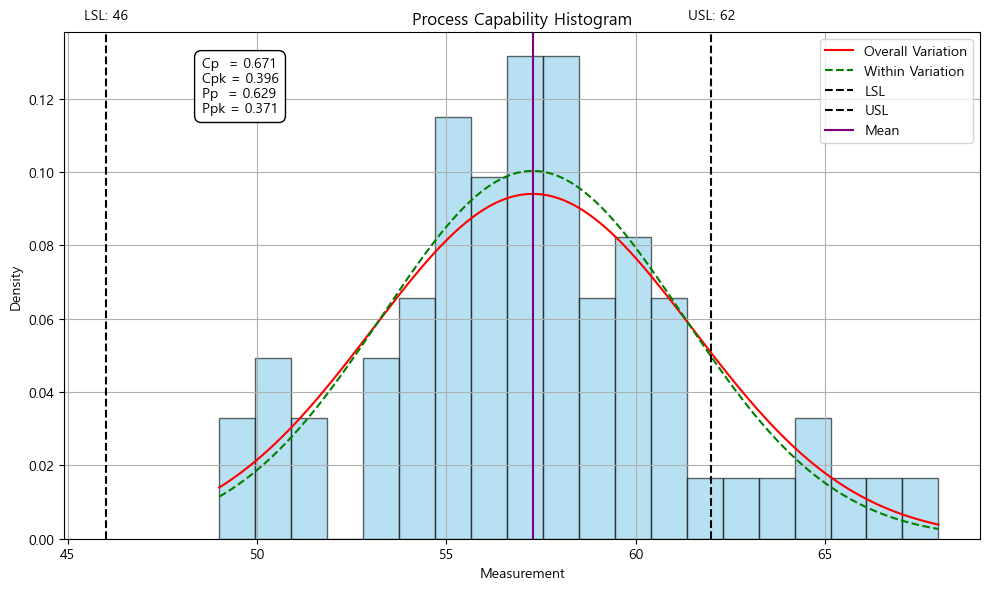

In [50]:
# 공정능력분석 수행(시각화)

plot_capability(capa,
                value_col = 'data',
                LSL = 46,
                USL = 62,
                result = result)
plt.show()